In [1]:
import warnings

warnings.filterwarnings(action='ignore')

import torch
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from forest_cover_change_detection.models.fc_ef_res_diff import FCFEResDiff
from notebooks.daudt.net_trainer import get_img_trio

In [6]:
df = pd.read_csv('../../../data/annotated/test.csv')
results = pd.read_csv('./results.csv')
metrics = pd.read_csv('./metric_eval.csv')

<Figure size 2400x1200 with 0 Axes>

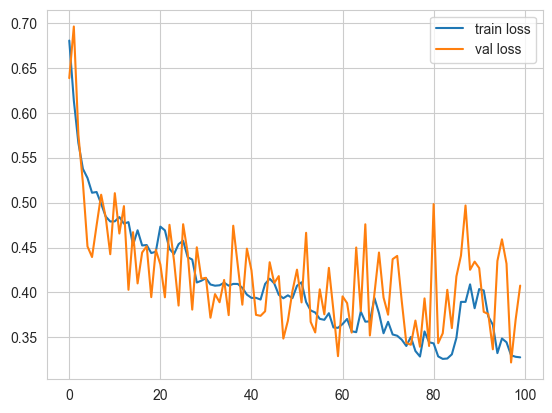

In [3]:
plt.figure(figsize=(12, 6), dpi=200)
results.loc[:, ['train loss', 'val loss']].plot()
plt.show()

In [7]:
metrics.describe().T

,count,mean,std,min,25%,50%,75%,max
overall accuracy,33.0,0.867914,0.117596,0.491043,0.825272,0.917786,0.950455,0.979553
change accuracy,33.0,0.384833,0.366560,0.000000,0.010796,0.277778,0.741294,1.000000
no change accuracy,33.0,0.878494,0.135728,0.473472,0.845871,0.923663,0.962873,0.997753
precision,33.0,0.127848,0.124262,0.000000,0.005995,0.084959,0.251710,0.382223
recall,33.0,0.376133,0.358990,0.000000,0.015072,0.281920,0.687014,1.000000
dice,27.0,0.214661,0.167137,0.002079,0.099595,0.159897,0.345179,0.532628
kappa,33.0,0.124214,0.145625,-0.036047,-0.003986,0.085824,0.235372,0.472040


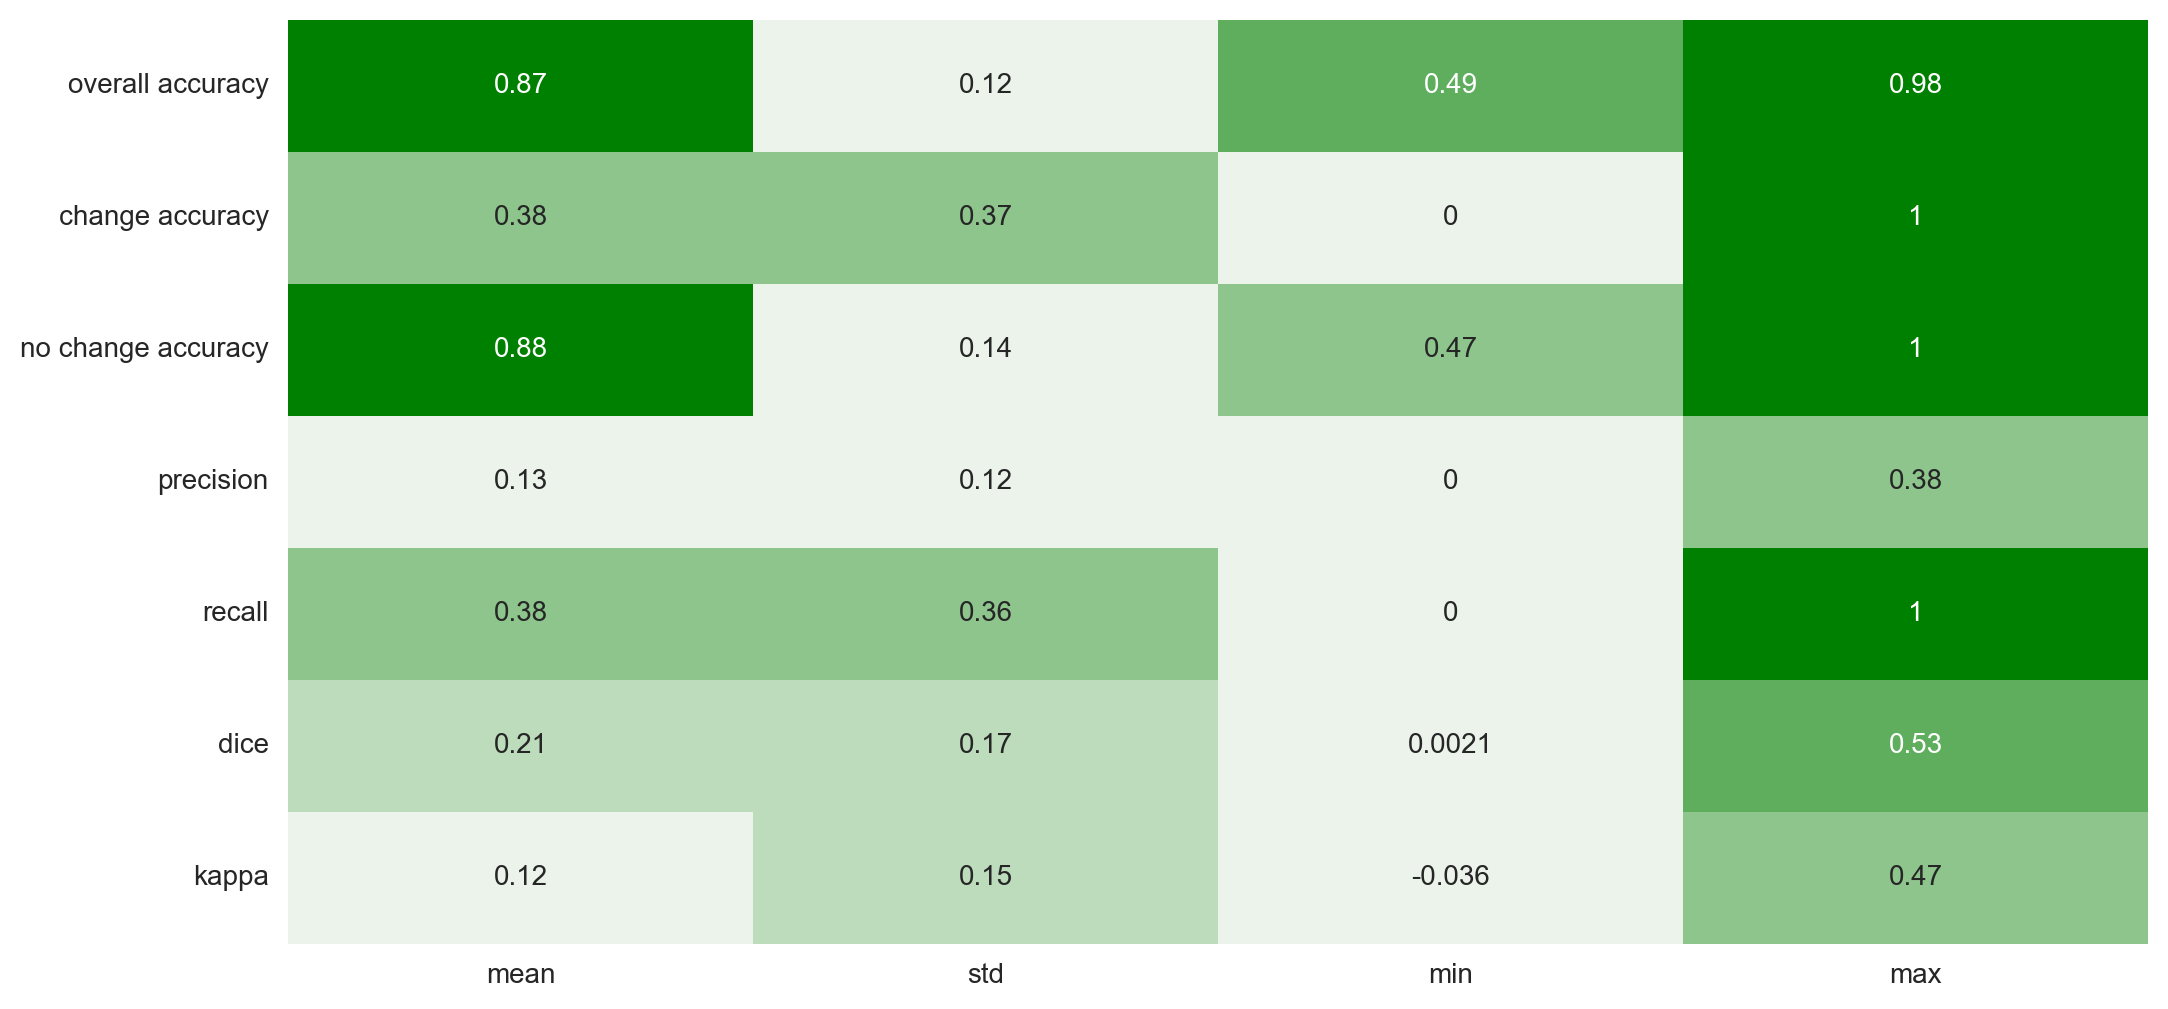

In [8]:
plt.figure(figsize=(12, 6), dpi=200)
sns.heatmap(metrics.describe().T[['mean', 'std', 'min', 'max']],
            annot=True,
            cbar=False,
            cmap=sns.light_palette('green'))
plt.show()

In [9]:
model = FCFEResDiff(3, 2)
state = torch.load(f"./best_model.pth")
model.load_state_dict(state['model_state_dict'])
model = model.cuda()

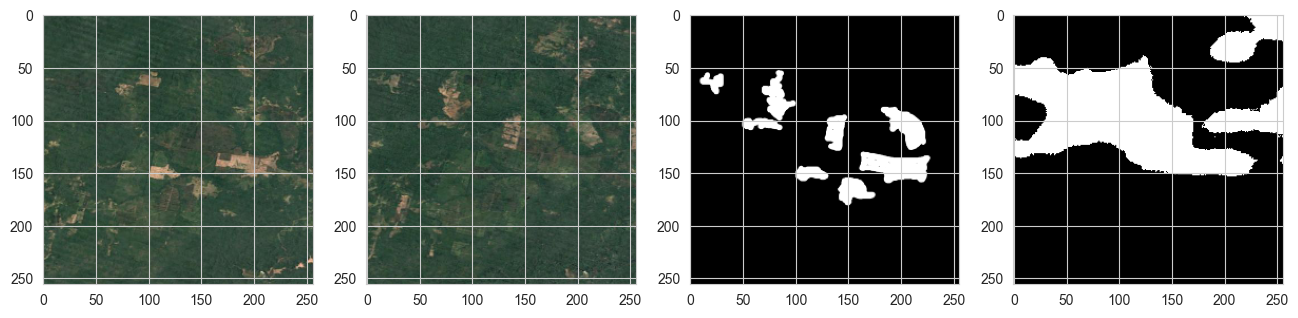

In [18]:
img_1, img_2, label, dir = df.sample(1).values.tolist()[0]
img1, img2, gt = get_img_trio(f'../../../data/annotated/{dir}/{img_1}',
                              f'../../../data/annotated/{dir}/{img_2}',
                              f'../../../data/annotated/{label}')

with torch.no_grad():
    model.eval()
    logits = model(img1.unsqueeze(0).to('cuda'),
                   img2.unsqueeze(0).to('cuda'))[0].cpu()
    pred = torch.argmax(torch.sigmoid(logits), dim=0)

plt.figure(figsize=(16, 10))
plt.subplot(1, 4, 1)
plt.imshow(img1.permute(1, 2, 0), cmap='gray')
plt.subplot(1, 4, 3)
plt.imshow(gt, cmap='gray')
plt.subplot(1, 4, 2)
plt.imshow(img2.permute(1, 2, 0), cmap='gray')
plt.subplot(1, 4, 4)
plt.imshow(pred, cmap='gray')